# Data Mining Final Project

Begin by loading the prepared data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
ratings = pd.read_csv('ratings_prepared.csv', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

# Reading users file
users = pd.read_csv('users_prepared.csv', encoding='latin-1', usecols = ['user_id', 'is_F', 'is_M', 'age_18_24', 'age_25_34', 'age_35_44',
       'age_45_49', 'age_50_55', 'age_56plus', 'age_u18', 'job_artist',
       'job_clerical', 'job_college_student', 'job_cust_service',
       'job_engineer', 'job_exec', 'job_farmer', 'job_homemaker',
       'job_k12student', 'job_lawyer', 'job_medical', 'job_other',
       'job_programmer', 'job_retired', 'job_sales', 'job_scientist',
       'job_self_emp', 'job_teacher', 'job_trade', 'job_unemployed',
       'job_writer', 'zip_0', 'zip_1', 'zip_2', 'zip_3', 'zip_4', 'zip_5',
       'zip_6', 'zip_7', 'zip_8', 'zip_9'])

# Reading movies file
movies = pd.read_csv('movies_prepared.csv', encoding='latin-1', usecols = ['movie_id','title','is_drama','is_comedy','is_action','is_thriller','is_romance','is_horror','is_adventure','is_scifi','is_childrens','is_crime','is_war','is_documentary','is_musical','is_mystery','is_animation','is_fantasy','is_western','is_filmnoir','year'])

## Data Review

As a refresher, review the formatting of the data.

### Ratings DataFrame

In [2]:
#review the formatting of ratings DataFrame
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991384 entries, 0 to 991383
Data columns (total 3 columns):
user_id     991384 non-null int64
movie_id    991384 non-null int64
rating      991384 non-null int64
dtypes: int64(3)
memory usage: 22.7 MB


In [3]:
#confirming correct user count of 6040
ratings.user_id.nunique()

6040

In [4]:
ratings.head()

,user_id,movie_id,rating
0,0,1176,5
1,0,655,3
2,0,902,3
3,0,3339,4
4,0,2286,5


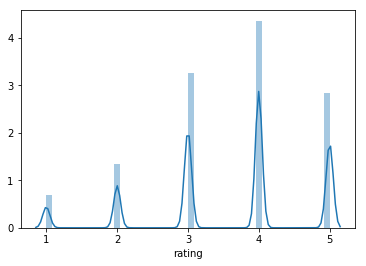

In [5]:
#review the distribution of the ratings within the set
import seaborn as sns

sns.distplot(ratings.rating)

### Users Dataset

In [7]:
#print data formatting
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 41 columns):
user_id                6040 non-null int64
is_F                   6040 non-null int64
is_M                   6040 non-null int64
zip_0                  6040 non-null int64
zip_1                  6040 non-null int64
zip_2                  6040 non-null int64
zip_3                  6040 non-null int64
zip_4                  6040 non-null int64
zip_5                  6040 non-null int64
zip_6                  6040 non-null int64
zip_7                  6040 non-null int64
zip_8                  6040 non-null int64
zip_9                  6040 non-null int64
age_18_24              6040 non-null int64
age_25_34              6040 non-null int64
age_35_44              6040 non-null int64
age_45_49              6040 non-null int64
age_50_55              6040 non-null int64
age_56plus             6040 non-null int64
age_u18                6040 non-null int64
job_artist             6040 non-n

In [8]:
#review data readout
users.head(2)

,user_id,is_F,is_M,zip_0,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,...,job_other,job_programmer,job_retired,job_sales,job_scientist,job_self_emp,job_teacher,job_trade,job_unemployed,job_writer
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Since the variables are indicators, we can take the mean of a given column to determine the overall percentage of users within a given categorization. We seee that the group is heavily weighted towards men and that some age groups are under-represented, but there is a reasonable enough distribution for our needs.

In [9]:
users.mean()

user_id                3020.500000
is_F                      0.282947
is_M                      0.717053
zip_0                     0.109603
zip_1                     0.109603
zip_2                     0.073013
zip_3                     0.063907
zip_4                     0.100497
zip_5                     0.109106
zip_6                     0.071192
zip_7                     0.069371
zip_8                     0.050662
zip_9                     0.243046
age_18_24                 0.182616
age_25_34                 0.347020
age_35_44                 0.197517
age_45_49                 0.091060
age_50_55                 0.082119
age_56plus                0.062914
age_u18                   0.036755
job_artist                0.044205
job_clerical              0.028642
job_college_student       0.125662
job_cust_service          0.018543
job_engineer              0.083113
job_exec                  0.112417
job_farmer                0.002815
job_homemaker             0.015232
job_k12student      

### Movies Dataset

In [10]:
#review DF info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 21 columns):
movie_id          3883 non-null int64
title             3883 non-null object
is_drama          3883 non-null int64
is_comedy         3883 non-null int64
is_action         3883 non-null int64
is_thriller       3883 non-null int64
is_romance        3883 non-null int64
is_horror         3883 non-null int64
is_adventure      3883 non-null int64
is_scifi          3883 non-null int64
is_childrens      3883 non-null int64
is_crime          3883 non-null int64
is_war            3883 non-null int64
is_documentary    3883 non-null int64
is_musical        3883 non-null int64
is_mystery        3883 non-null int64
is_animation      3883 non-null int64
is_fantasy        3883 non-null int64
is_western        3883 non-null int64
is_filmnoir       3883 non-null int64
year              3883 non-null int64
dtypes: int64(20), object(1)
memory usage: 637.1+ KB


In [11]:
#review data sample
movies.head()

,movie_id,title,is_drama,is_comedy,is_action,is_thriller,is_romance,is_horror,is_adventure,is_scifi,...,is_crime,is_war,is_documentary,is_musical,is_mystery,is_animation,is_fantasy,is_western,is_filmnoir,year
0,0,Toy Story,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1995
1,1,Jumanji,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1995
2,2,Grumpier Old Men,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,3,Waiting to Exhale,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,4,Father of the Bride Part II,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995


We now need to splice the review data along the various feature sets. Deploy a function that adds in a new column to the reviews dataset for a given indicator variable, and returns only those reviews from users who meet that criterion.

In [12]:
from tqdm import tqdm_notebook

def UserIndicatorExtract(idcol,indicatorcol):
    '''
    Accepts a column of a DataFrame.  Extracts the value and DataFrame index of that column,
    returning a dictionary of {value: index} that can be used to transform the index of the dataset to
    match the row indexing of the DataFrame.
    '''
    index_dict = {}
    #for index, value in tqdm_notebook(enumerate(idcol)):
    for index, value in enumerate(idcol):
        index_dict.update({value : indicatorcol[index]})
    return index_dict

In [16]:
def AddIndicator(indicatorcol, reviewdf, reviewidcol):
    #extract indicator column name
    new_col_name = indicatorcol.name
    #copy ID column into new indicator column
    reviewdf['newcol'] = reviewidcol
    #create dict of user_id : indicator, apply over new col
    indicator_dict = UserIndicatorExtract(users.user_id,indicatorcol)
    reviewdf.newcol.replace(to_replace = indicator_dict, inplace = True)
    reviewdf.rename(columns={'newcol':new_col_name}, inplace = True)

In [13]:
users.columns

Index(['user_id', 'is_F', 'is_M', 'zip_0', 'zip_1', 'zip_2', 'zip_3', 'zip_4',
       'zip_5', 'zip_6', 'zip_7', 'zip_8', 'zip_9', 'age_18_24', 'age_25_34',
       'age_35_44', 'age_45_49', 'age_50_55', 'age_56plus', 'age_u18',
       'job_artist', 'job_clerical', 'job_college_student', 'job_cust_service',
       'job_engineer', 'job_exec', 'job_farmer', 'job_homemaker',
       'job_k12student', 'job_lawyer', 'job_medical', 'job_other',
       'job_programmer', 'job_retired', 'job_sales', 'job_scientist',
       'job_self_emp', 'job_teacher', 'job_trade', 'job_unemployed',
       'job_writer'],
      dtype='object')

In [14]:
features_to_add = [users.is_F , users.is_M , users.zip_0 , users.zip_1 , users.zip_2 , users.zip_3 , users.zip_4,
       users.zip_5 , users.zip_6 , users.zip_7 , users.zip_8 , users.zip_9 , users.age_18_24 , users.age_25_34,
       users.age_35_44 , users.age_45_49 , users.age_50_55 , users.age_56plus , users.age_u18,
       users.job_artist , users.job_clerical , users.job_college_student , users.job_cust_service,
       users.job_engineer , users.job_exec , users.job_farmer , users.job_homemaker,
       users.job_k12student , users.job_lawyer , users.job_medical , users.job_other,
       users.job_programmer , users.job_retired , users.job_sales , users.job_scientist,
       users.job_self_emp , users.job_teacher , users.job_trade , users.job_unemployed,
       users.job_writer]

Adding these features is time-consuming - we save the output so it can be reloaded in the future.

In [17]:
from tqdm import tqdm_notebook

for feature in tqdm_notebook(features_to_add):
    AddIndicator(feature, ratings, ratings.user_id)

To confirm the process completed as hoped for, we review a sample filter on the review dataset.

In [20]:
ratings.loc[ratings['is_F'] == 0].head()

,user_id,movie_id,rating,is_F,is_M,zip_0,zip_1,zip_2,zip_3,zip_4,...,job_other,job_programmer,job_retired,job_sales,job_scientist,job_self_emp,job_teacher,job_trade,job_unemployed,job_writer
0,0,1176,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,655,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,902,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3339,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2286,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
ratings.to_csv('ratings_with_features.csv', header = True)

In [ ]:
ratings = pd.read_csv('ratings_with_features.csv', usecols = ['user_id', 'movie_id', 'rating', 'zip', 'is_F', 'is_M',
       'age_18_24', 'age_25_34', 'age_35_44', 'age_45_49', 'age_50_55',
       'age_56plus', 'age_u18', 'job_artist', 'job_clerical',
       'job_college_student', 'job_cust_service', 'job_engineer', 'job_exec',
       'job_farmer', 'job_homemaker', 'job_k12student', 'job_lawyer',
       'job_medical', 'job_other', 'job_programmer', 'job_retired',
       'job_sales', 'job_scientist', 'job_self_emp', 'job_teacher',
       'job_trade', 'job_unemployed', 'job_writer'])

In [21]:
ratings.head()

,user_id,movie_id,rating,is_F,is_M,zip_0,zip_1,zip_2,zip_3,zip_4,...,job_other,job_programmer,job_retired,job_sales,job_scientist,job_self_emp,job_teacher,job_trade,job_unemployed,job_writer
0,0,1176,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,655,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,902,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3339,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2286,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


With the model space now prepared, we run an algorithm that will compute the grand mean values for each indicator variable, and then find the differences of means for the reviewers of each film.  If the mean for a particular film is higher than the grand mean, it indicates that the film in question is particularly popular among that demographic subgroup.  These mean difference values can then be queried to find the $n$ most uniquely popular films for that group. Note that we also preserve the rating value so that we can ensure that the films unique to a group are uniquely *liked* by that grouping.

In [28]:
ratings_stripped = ratings.iloc[:,2:]

In [29]:
ratings_all_means = ratings_stripped.mean()
#abs(ratings[ratings.movie_id == 123].mean() - ratings_all_means)
ratings_all_means

rating                 3.582310
is_F                   0.279077
is_M                   0.720870
zip_0                  0.113477
zip_1                  0.106213
zip_2                  0.070339
zip_3                  0.063083
zip_4                  0.098261
zip_5                  0.103800
zip_6                  0.069291
zip_7                  0.071973
zip_8                  0.050543
zip_9                  0.252967
age_18_24              0.188410
age_25_34              0.341343
age_35_44              0.194406
age_45_49              0.091935
age_50_55              0.082284
age_56plus             0.063096
age_u18                0.038472
job_artist             0.041946
job_clerical           0.027640
job_college_student    0.133448
job_cust_service       0.018077
job_engineer           0.085974
job_exec               0.108468
job_farmer             0.002227
job_homemaker          0.013141
job_k12student         0.031817
job_lawyer             0.020377
job_medical            0.040248
job_othe

To ensure the algorithm is not thrown off by a single user within the set, it will ignore any film with fewer than ten ratings.

In [30]:
def FindUniqueFilmsByFeature(num_movies = 3883):
    #extract grand means of dataset
    ratings_all_means = ratings_stripped.mean()
    #extract column names
    col_names = ratings_stripped.columns
    output = pd.DataFrame(index=np.arange(num_movies), columns=col_names).fillna(0)
    output.fillna(0)
    for film_id in tqdm_notebook(np.arange(num_movies)):
        if ratings[ratings.movie_id == film_id].shape[0] < 10:
            pass
        else:
            output.iloc[film_id] = ratings_stripped[ratings.movie_id == film_id].mean() - ratings_all_means
    return output

In [31]:
user_rating_feature_map = FindUniqueFilmsByFeature(num_movies = 3883)

In [32]:
user_rating_feature_map.head()

,rating,is_F,is_M,zip_0,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,...,job_other,job_programmer,job_retired,job_sales,job_scientist,job_self_emp,job_teacher,job_trade,job_unemployed,job_writer
0,0.564536,-0.008012,0.007584,0.003519,0.000672,-0.004379,-0.000974,0.001884,0.009344,-0.000923,...,0.001219,-0.001063,-0.001990,0.002922,0.002189,0.003234,0.010391,-0.001433,-0.001450,0.001935
1,-0.381169,-0.018021,0.018074,-0.007913,-0.004929,0.009547,0.016803,-0.012669,0.010322,0.007742,...,-0.000281,-0.012316,-0.004648,0.002796,0.007556,-0.007751,-0.002164,0.000813,0.001260,-0.008212
2,-0.565574,-0.011294,0.011348,0.012046,0.015126,0.007067,-0.006597,0.004250,0.017539,-0.004437,...,-0.009231,-0.006520,-0.001607,0.017056,0.004034,0.004798,-0.010920,-0.005749,-0.000453,-0.005648
3,-0.852898,-0.026135,0.026189,0.027700,-0.023860,0.000249,0.001623,-0.015908,0.019729,-0.010467,...,-0.031875,0.017255,-0.006972,0.007235,-0.007608,-0.015606,0.012068,-0.006143,0.022289,-0.002522
4,-0.575553,-0.015563,0.015616,0.004767,0.005273,0.003985,0.011242,-0.013801,0.004308,0.001655,...,0.018404,0.002470,0.002408,-0.001787,0.001772,-0.015487,-0.000969,0.001488,0.003887,-0.002284


In [33]:
user_rating_feature_map.columns

Index(['rating', 'is_F', 'is_M', 'zip_0', 'zip_1', 'zip_2', 'zip_3', 'zip_4',
       'zip_5', 'zip_6', 'zip_7', 'zip_8', 'zip_9', 'age_18_24', 'age_25_34',
       'age_35_44', 'age_45_49', 'age_50_55', 'age_56plus', 'age_u18',
       'job_artist', 'job_clerical', 'job_college_student', 'job_cust_service',
       'job_engineer', 'job_exec', 'job_farmer', 'job_homemaker',
       'job_k12student', 'job_lawyer', 'job_medical', 'job_other',
       'job_programmer', 'job_retired', 'job_sales', 'job_scientist',
       'job_self_emp', 'job_teacher', 'job_trade', 'job_unemployed',
       'job_writer'],
      dtype='object')

We now build a series of recommender helper functions that will power the final recommendation engine.  We have strong enough representation among the age, gender, and ZIP code data that each sub-model will find the ten most unique values to a given demographic grouping and then randomly return five of those results - this is done both to ensure the model achieves maximum coverage over the dataset and also to reduce the risk that the films returned are simply five movies that are quite popular overall but *extremely* popular among a demographic.

In [75]:
list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_u18.nlargest(10).index)

[385, 295, 1496, 94, 627, 3023, 3568, 1399, 1138, 3543]

In [79]:
from random import choices

def ColdStartAgeRecs(user_rating_feature_map, age):
    #initialize list, ensure age is int type
    rec_list = []
    age = int(age)
    if age <= 18:
        rec_list = list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_u18.nlargest(10).index)
    elif age <= 24:
        rec_list = list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_18_24.nlargest(10).index)
    elif age <= 34:
        rec_list = list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_25_34.nlargest(10).index)
    elif age <= 44:
        rec_list = list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_35_44.nlargest(10).index)
    elif age <= 49:
        rec_list = list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_45_49.nlargest(10).index)
    elif age <= 55:
        rec_list = list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_50_55.nlargest(10).index)
    else:
        rec_list = list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_56plus.nlargest(10).index)
    output = choices(rec_list, k=5)
    return output


In [92]:
#test function output
ColdStartAgeRecs(user_rating_feature_map, 34)

[3068, 2835, 962, 761, 3213]

In [110]:
def ColdStartJobRecs(user_rating_feature_map, job_num):
    job_dict = {1: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_artist.nlargest(5).index), 
                2: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_clerical.nlargest(5).index), 
                3: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_college_student.nlargest(5).index), 
                4: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_cust_service.nlargest(5).index), 
                5: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_engineer.nlargest(5).index), 
                6: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_exec.nlargest(5).index), 
                7: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_farmer.nlargest(5).index), 
                8: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_homemaker.nlargest(5).index), 
                9: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_k12student.nlargest(5).index), 
                10: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_lawyer.nlargest(5).index), 
                11: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_medical.nlargest(5).index), 
                12: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_other.nlargest(5).index), 
                13: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_programmer.nlargest(5).index), 
                14: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_retired.nlargest(5).index), 
                15: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_sales.nlargest(5).index), 
                16: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_scientist.nlargest(5).index), 
                17: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_self_emp.nlargest(5).index),
                18: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_teacher.nlargest(5).index), 
                19: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_trade.nlargest(5).index), 
                20: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_unemployed.nlargest(5).index), 
                21: list(user_rating_feature_map[user_rating_feature_map.rating > 0].job_writer.nlargest(5).index)}
    return job_dict[job_num]

In [114]:
ColdStartJobRecs(user_rating_feature_map, 3)

[2128, 853, 849, 3213, 835]

In [116]:
def ColdStartZipRecs(user_rating_feature_map, zip_num):
    zip_num = int(zip_num)
    zip_dict = {
        0: list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_0.nlargest(10).index),
        1: list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_1.nlargest(10).index),
        2: list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_2.nlargest(10).index),
        3: list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_3.nlargest(10).index),
        4: list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_4.nlargest(10).index),
        5: list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_5.nlargest(10).index),
        6: list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_6.nlargest(10).index),
        7: list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_7.nlargest(10).index),
        8: list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_8.nlargest(10).index),
        9: list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_9.nlargest(10).index),
    }
    output = choices(zip_dict[zip_num], k=5)
    return output

In [120]:
ColdStartZipRecs(user_rating_feature_map, 6)

[3563, 2862, 3576, 2273, 2273]

In [140]:
def ColdStartGenderRecs(user_rating_feature_map, is_F):
    if is_F == 1:
        long_list = list(user_rating_feature_map[user_rating_feature_map.rating > 0].is_F.nlargest(20).index)
    else:
        long_list =list(user_rating_feature_map[user_rating_feature_map.rating > 0].is_M.nlargest(20).index)
    output = choices(long_list, k=10)
    return output

In [144]:
ColdStartGenderRecs(user_rating_feature_map, 1)

[1138, 3260, 2412, 3563, 659, 1101, 3063, 693, 3563, 1138]

In [145]:
def ColdStartRecs(user_rating_feature_map, age, job_num, zip_num, is_F):
    #initialize list
    big_list = []
    #add age predictor values
    big_list = ColdStartAgeRecs(user_rating_feature_map, age)
    #add job values
    big_list.extend(ColdStartJobRecs(user_rating_feature_map, job_num))
    #add ZIP values
    big_list.extend(ColdStartZipRecs(user_rating_feature_map, zip_num))
    #add gender values
    big_list.extend(ColdStartGenderRecs(user_rating_feature_map, is_F))
    output = []
    for index in big_list:
        output.append(movies.title.iloc[index])
    return np.unique(output)

In [146]:
ColdStartRecs(user_rating_feature_map, 34, 18, 6, 0)


array(['Arguing the World', 'Brother, Can You Spare a Dime?',
       'Cold Fever', 'Different for Girls', 'Firelight',
       'Hanging Garden, The', 'Hard Core Logo', 'Hate',
       'Hearts and Minds', 'In the Bleak Midwinter', 'Land and Freedom',
       'Last September, The', 'Love in the Afternoon',
       'Lovers of the Arctic Circle, The', 'Monsieur Verdoux',
       'Once Upon a Time... When We Were Colored', 'Roadside Prophets',
       "Some Mother's Son", 'Time of the Gypsies', 'West Beirut'],
      dtype='<U40')

To get a sense of how far this model can dig into the total number of films in the dataset, we wrote a modified version of the function that will sum up the total amount of possible values that could be returned by the algorithm.  Note that we run the age and ZIP calls multiple times to get closer to the full ten values that each of those models could return.

In [164]:
def ColdStartRecCoverage(user_rating_feature_map):
    #initialize list
    big_list = []
    
    #add age predictor values
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_u18.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_18_24.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_25_34.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_35_44.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_45_49.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_50_55.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].age_56plus.nlargest(10).index))
    
    #add job values
    for job_num in np.arange(1,22):
        big_list.extend(ColdStartJobRecs(user_rating_feature_map, job_num))
    
    #add ZIP values
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_0.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_1.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_2.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_3.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_4.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_5.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_6.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_7.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_8.nlargest(10).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].zip_9.nlargest(10).index))
    #add gender values
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].is_F.nlargest(20).index))
    big_list.extend(list(user_rating_feature_map[user_rating_feature_map.rating > 0].is_M.nlargest(20).index))
    
    print("{0} total values generated, {1} are unique".format(len(big_list),len(np.unique(big_list))))
    print("{0:.3f} coverage factor for positively rated films"
          .format(user_rating_feature_map[user_rating_feature_map.rating > 0].shape[0]/user_rating_feature_map.shape[0]))

In [165]:
ColdStartRecCoverage(user_rating_feature_map)

315 total values generated, 133 are unique
0.298 coverage factor for positively rated films


To create a collaborative recommendation engine, we tried a few different approaches.  The first used a set of helper functions that will drive a looping function.  The first helper function will process the years values, and the second will use this value to help compute an overall similarity value.  Similarity value is defined so that two movies with no similiar genres will have a similarity score of 0, and a movie will have a similarity score of 1 to both itself and any other film with identical genres made in the same year.

At this point, we are now able to built matrices representing the similarity of two given movies along a given dimension.  The challenge was to find a logical and efficient means of doing so, and our first thought was to try and built out a custom-made algorithm.  These experiments, however, proved extremely computationally expensive: Pandas simply is not built for iterating over its rows and columns.  The principle we had in mind was simple enough - deploy an 'affinity-esque' principle in which the features two films share in common would be divided by the sum total of values between the two films, and return a value ranging from 0 (no features in common) to 1 (all features in common).

Here are two function that were built out in an attempt to achieve such an outcome:

```Python
def SimilarityIndex(row, df):
    '''
    Accepts a row index and a DataFrame
    
    Returns a float of the similarity index of two films.  
    Values range from 0 to 1.    
    '''
    #sum the rows
    summed_rows = df.apply(lambda x: x + row, axis = 1)
    summed_rows.drop('year', inplace = True, axis = 1)
    #return summed_rows
    #weight sum as (number of genre overlaps)/(total genre values)
    feature_sums = round(summed_rows.apply(lambda x: sum(x.loc[x > 1])/(sum(x)), axis = 1), 3)
    return feature_sums
```
Here is the second iteration of the same:

```Python
def SimilarityIndex(row1, row2):
    '''
    Accepts two pd.Series.
    
    Returns a float of the similarity index of two films.  
    Values range from 0 to 1.    
    '''
    #sum the rows
    summed_rows = row1[:-1] + row2[:-1]
    #weight sum as (number of genre overlaps)/(total genre values)
    feature_sum = sum(summed_rows[summed_rows == 2])/sum(summed_rows)
    
    if feature_sum == 0:
        return 0
    
    else:
        #weight year values by decreasing similarity index of films not made in same year
        year_value = YearSimilarityIndex(row1[-1], row2[-1])
        #round value to save storage space
        output = round((feature_sum - year_value), 3)
        return output
    
def MakeSimilarityMatrix(df):
    '''
    Accepts a DataFrame with indicator variables. 
    
    Returns a similarity matrix such that output[i,j] = the similarity index of movie i to movie j.
    '''
    #extract the shape of the input matrix
    rows, cols = df.shape
    
    #initialize an rows * rows DataFrame, fill with zeros 
    output_df = pd.DataFrame(0, index = np.arange(0, rows), columns = np.arange(rows))
    
    #loop over every row
    for index, row in tqdm(df.iterrows()):
        #loop that row over every other row
        for n in tqdm(range(rows)):
            #compute similarity index using helper function
            output_df.iloc[index - 1, n] = SimilarityIndex(df.iloc[index - 1,:], df.iloc[n,:])
    return output_df
```

Ultimately, for a feature space of this magnitude, using a pairwise cosine similarity algorithm proved multiple orders of magnitude faster - the function below provided an identical 0-to-1 feature similarity output in seconds instead of hours.

Here is the method by which we built a recommendation model using cosine similarity.

```Python
#import needed module
from sklearn.metrics.pairwise import cosine_similarity

def CleanDiagonal(df):
    '''
    Sets the diagonal of a DataFrame to 0.
    Returns the DataFrame.
    '''
    rows, cols = df.shape
    #print(rows)
    for r in range(rows):
        df[r, r] = 0
    return df

#set similarity values of a movie to itself to 0
#this will prevent a movie from returning itself as a recommendation
genre_year_matrix = CleanDiagonal(cos_genre_matrix)
```

We created matrices that represent both the user-by-user ratings and then rating similarity for a given film.  The user-by-user rating matrix can be used to find similar users either using cosine similarity or by using KNN or another clustering algorithm.

```Python
def MakeRatingMatrix(df, total_films):
    '''
    Accepts a DataFrame with a user_id, a movie_id, and a rating for the film.
    Outputs a DataFrame with row indices matching user_id and column indices matching film_id
    '''
    #extract dimensionality from input DataFrame
    num_rows = df.user_id.max()
    num_cols = total_films
    df_len = df.shape[0]
    user_idx = 0
    movie_idx = 1
    rating_idx = 2
    #initialize output DataFrame
    output = pd.DataFrame(0, index=range(num_rows + 1), columns=range(num_cols + 1))
    
    #iterate over input DataFrame, filling in values for each rating
    for i in range(df_len):
        try:
            output_x = df.iloc[i,user_idx]
            output_y = df.iloc[i,movie_idx]
            output.iloc[output_x, output_y] = df.iloc[i,rating_idx]
        except:
            print("error at i {0}".format(i))
            break
    return output

user_ratings_matrix = MakeRatingMatrix(ratings, movies.movie_id.max())

from sklearn.metrics.pairwise import cosine_similarity

user_similarity_by_review = cosine_similarity(user_ratings_matrix, dense_output=True)
film_similarity_by_review = cosine_similarity(user_ratings_matrix.T, dense_output=True)
```

It is also possible to find the similarity of two movies by feature using a KNN clustering model.  At its essence, this model space is defined along one set of axes by genre similarity and along another axis by year similarity.

```Python
from sklearn.neighbors import NearestNeighbors

def NeighborFit(df, n_neighbors = 5, radius = 1, algorithm = 'auto'):
    '''
    Accepts a DataFrame of indicator variables.
    
    Returns a NearestNeighbors model.
    '''
    model = NearestNeighbors(n_neighbors = n_neighbors, radius = radius, algorithm = algorithm)
    model.fit(df)
    return model

def NeighborLocate(model, input_array, n_neighbors = 5):
    '''
    Accepts a model and a Series or DataFrame of identical format to that used to build the model.
    
    Returns the distances and index values of the n_neighbors closest to the row(s) of the Series or DataFrame.
    '''
    
    #test to see if the input_array is two-dimensional
    try:
        x,y = input_array.shape
        
    except:
        #Series processing
        distances, indices = model.kneighbors(input_array.values.reshape(1, -1), n_neighbors = n_neighbors)
        return distances, indices
    
    #DataFrame processing 
    distances, indices = model.kneighbors(input_array, n_neighbors = n_neighbors)
    return distances, indices
```

While the recommendation model built using cosine similarity performed reasonably well according to an eye test, the eye test doesn't hold much rigor.  We finally settled on using the Surprise module so as to take advantage of its native model-scoring features.

In [172]:
#bring in the imports!
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [173]:
#initialize dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

With a wide variety of modelling tools now imported and available, we throw the proverbial kitchen sink at our review dataset to see which model(s) perform best.  Of course, this process will take quite a bit of time.

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in tqdm_notebook([SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]):
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

In [ ]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [ ]:
surprise_results